## Sentiment Analysis:
The process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral.

In [5]:
#Import Packages

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import warnings
import nltk
from nltk.tokenize import word_tokenize
import string
import seaborn as sns
from nltk.stem.porter import * 
from wordcloud import WordCloud

warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
# Loading the Dataset

dataset = pd.read_csv('#SwitchOffKPLC.csv')
dataset.head(3)

,0,1,2,3,4,5,6,7
0,2019-10-15 06:24:10,RT @JerotichSeii: That you be switched off.\n\...,en,TinkerBellLand,False,Twitter Web App,119,0
1,2019-10-15 04:08:22,UK renewables generate more electricity than f...,en,NaN,False,Twitter for Android,0,1
2,2019-10-14 18:00:17,Jameni @KenyaPower #SwitchOffKPLC https://t.co...,in,Nairobi,False,Twitter for Android,0,0


In [8]:
dataset = dataset.rename(columns={'0': 'Datetime Created', '1': 'Tweet','2':'Language','3':'Location','4':'UserAccount Verified','5':'Tweet Source','6':'Retweet_count','7':'Favourite_count'})

In [9]:
print("Dataset size:", len(dataset))

('Dataset size:', 634)


In [10]:
dataset.head(3)

,Datetime Created,Tweet,Language,Location,UserAccount Verified,Tweet Source,Retweet_count,Favourite_count
0,2019-10-15 06:24:10,RT @JerotichSeii: That you be switched off.\n\...,en,TinkerBellLand,False,Twitter Web App,119,0
1,2019-10-15 04:08:22,UK renewables generate more electricity than f...,en,NaN,False,Twitter for Android,0,1
2,2019-10-14 18:00:17,Jameni @KenyaPower #SwitchOffKPLC https://t.co...,in,Nairobi,False,Twitter for Android,0,0


In [11]:
#User Defined Function to clean unwanted text patterns from all tweets
# input - text to clean,pattern to replace
def cleantext(inputword,pattern):
    r = re.findall(pattern=pattern,string=inputword)
    for i in r:
        inputword = re.sub(pattern=i,repl='',string=inputword)
    return inputword

In [12]:
#Removing all twitter handles because they are already masked as @user due to privacy concerns.
#These twitter handles hardly give any information about the nature of the tweet.

dataset['Tweet'] = np.vectorize(cleantext)(dataset['Tweet'],'@[\w]*')
dataset.head()

,Datetime Created,Tweet,Language,Location,UserAccount Verified,Tweet Source,Retweet_count,Favourite_count
0,2019-10-15 06:24:10,RT : That you be switched off.\n\n#SwitchOffKP...,en,TinkerBellLand,False,Twitter Web App,119,0
1,2019-10-15 04:08:22,UK renewables generate more electricity than f...,en,NaN,False,Twitter for Android,0,1
2,2019-10-14 18:00:17,Jameni #SwitchOffKPLC https://t.co/C3sJivTBWd,in,Nairobi,False,Twitter for Android,0,0
3,2019-10-13 16:29:21,This was not attended to. We are still in the...,en,"Nairobi, Kenya",False,Twitter for Android,0,0
4,2019-10-13 15:35:09,KPLC must be switched off.\n\n#SwitchOffKPLC,en,NaN,False,Twitter for Android,0,1


In [13]:
dataset['Tweet'] = dataset['Tweet'].str.replace("[^a-zA-Z#]"," ")
dataset.head()

,Datetime Created,Tweet,Language,Location,UserAccount Verified,Tweet Source,Retweet_count,Favourite_count
0,2019-10-15 06:24:10,RT That you be switched off #SwitchOffKPLC...,en,TinkerBellLand,False,Twitter Web App,119,0
1,2019-10-15 04:08:22,UK renewables generate more electricity than f...,en,NaN,False,Twitter for Android,0,1
2,2019-10-14 18:00:17,Jameni #SwitchOffKPLC https t co C sJivTBWd,in,Nairobi,False,Twitter for Android,0,0
3,2019-10-13 16:29:21,This was not attended to We are still in the...,en,"Nairobi, Kenya",False,Twitter for Android,0,0
4,2019-10-13 15:35:09,KPLC must be switched off #SwitchOffKPLC,en,NaN,False,Twitter for Android,0,1


In [14]:
dataset['Tweet'] = dataset['Tweet'].str.replace(r'\b(\w{1,2})\b', '')
dataset.head()

,Datetime Created,Tweet,Language,Location,UserAccount Verified,Tweet Source,Retweet_count,Favourite_count
0,2019-10-15 06:24:10,That you switched off #SwitchOffKPLC htt...,en,TinkerBellLand,False,Twitter Web App,119,0
1,2019-10-15 04:08:22,renewables generate more electricity than fos...,en,NaN,False,Twitter for Android,0,1
2,2019-10-14 18:00:17,Jameni #SwitchOffKPLC https sJivTBWd,in,Nairobi,False,Twitter for Android,0,0
3,2019-10-13 16:29:21,This was not attended are still the dark ...,en,"Nairobi, Kenya",False,Twitter for Android,0,0
4,2019-10-13 15:35:09,KPLC must switched off #SwitchOffKPLC,en,NaN,False,Twitter for Android,0,1


In [15]:
#Tokenize the tweets
tokenized_tweets = dataset['Tweet'].apply(lambda x:x.split())
tokenized_tweets.head()

0    [That, you, switched, off, #SwitchOffKPLC, htt...
1    [renewables, generate, more, electricity, than...
2            [Jameni, #SwitchOffKPLC, https, sJivTBWd]
3    [This, was, not, attended, are, still, the, da...
4          [KPLC, must, switched, off, #SwitchOffKPLC]
Name: Tweet, dtype: object

In [16]:
#Stemming the words to remove words with similar meaning
stemmer = PorterStemmer()
tokenized_tweets = tokenized_tweets.apply(lambda x : [stemmer.stem(i) for i in x]  )

In [17]:
tokenized_tweets.head()

0    [that, you, switch, off, #switchoffkplc, http,...
1    [renew, gener, more, electr, than, fossil, fue...
2             [jameni, #switchoffkplc, http, sjivtbwd]
3    [thi, wa, not, attend, are, still, the, dark, ...
4            [kplc, must, switch, off, #switchoffkplc]
Name: Tweet, dtype: object

In [18]:
#Joining the tokenized tweets

for i in range(len(tokenized_tweets)):
    tokenized_tweets[i] = ' '.join(tokenized_tweets[i])    
dataset['Tweet'] = tokenized_tweets

In [19]:
dataset.head()

,Datetime Created,Tweet,Language,Location,UserAccount Verified,Tweet Source,Retweet_count,Favourite_count
0,2019-10-15 06:24:10,that you switch off #switchoffkplc http hjilul...,en,TinkerBellLand,False,Twitter Web App,119,0
1,2019-10-15 04:08:22,renew gener more electr than fossil fuel for t...,en,NaN,False,Twitter for Android,0,1
2,2019-10-14 18:00:17,jameni #switchoffkplc http sjivtbwd,in,Nairobi,False,Twitter for Android,0,0
3,2019-10-13 16:29:21,thi wa not attend are still the dark day and c...,en,"Nairobi, Kenya",False,Twitter for Android,0,0
4,2019-10-13 15:35:09,kplc must switch off #switchoffkplc,en,NaN,False,Twitter for Android,0,1


## Categorizing the Tweet Column into Positive and Negative sentiments using TextBlob

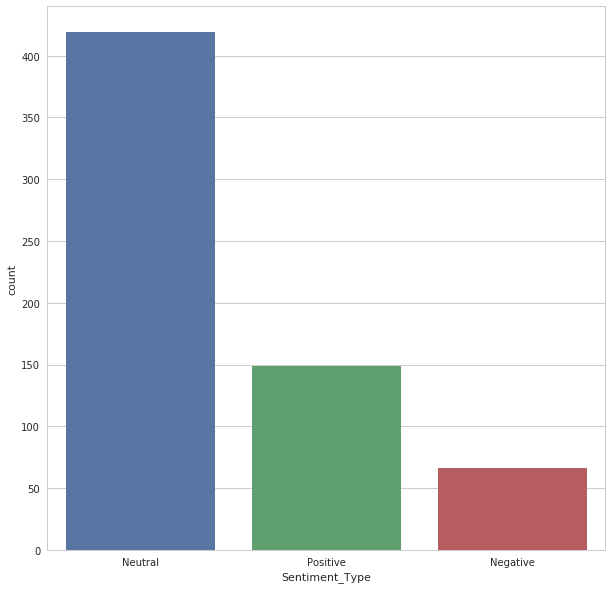

In [38]:
from textblob import TextBlob

bloblist_title = list()

df_usa_title_str=dataset['Tweet']
for row in df_usa_title_str:
    blob = TextBlob(row)
    bloblist_title.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_title = pd.DataFrame(bloblist_title, columns = ['sentence','sentiment','polarity'])
 
def f_title(df_usa_polarity_title):
    if df_usa_polarity_title['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_title['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_title['Sentiment_Type'] = df_usa_polarity_title.apply(f_title, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_title)

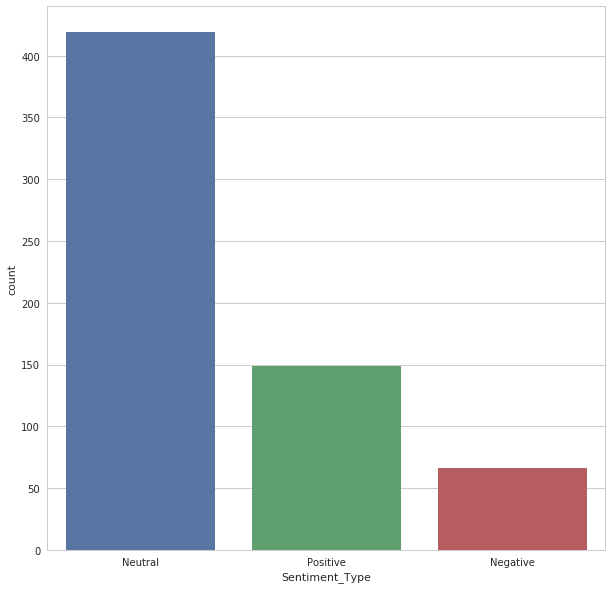

In [39]:
from textblob import TextBlob

bloblist_tags = list()

df_usa_tags_str=dataset['Tweet']
for row in df_usa_tags_str:
    blob = TextBlob(row)
    bloblist_tags.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_tags = pd.DataFrame(bloblist_tags, columns = ['sentence','sentiment','polarity'])
 
def f_tags(df_usa_polarity_tags):
    if df_usa_polarity_tags['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_tags['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_tags['Sentiment_Type'] = df_usa_polarity_tags.apply(f_tags, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_tags)

## Data Preprocessing

### Decoding the Date Time Column

In [26]:
from datetime import date

In [28]:
dataset['Datetime Created'] = pd.to_datetime(dataset['Datetime Created'])

In [29]:
dataset['Year'] = dataset['Datetime Created'].dt.year
dataset['Week of the Year'] = dataset['Datetime Created'].dt.weekofyear
dataset['Day of the Year'] = dataset['Datetime Created'].dt.dayofyear
dataset['Month_name'] = dataset['Datetime Created'].dt.month_name()
dataset['Day of the Week'] = dataset['Datetime Created'].dt.weekday
dataset['Name of the Day'] = dataset['Datetime Created'].dt.day_name()
dataset['Hour'] = dataset['Datetime Created'].dt.hour
dataset['Minute'] = dataset['Datetime Created'].dt.minute


## Correlation Plot Visualization of the Day of the Week Tweets Distribution

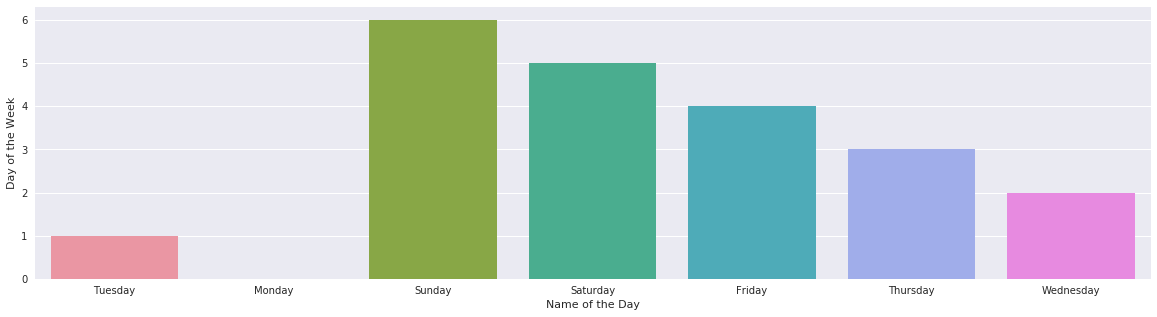

In [30]:
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x=dataset['Name of the Day'],y=dataset['Day of the Week']);

Text(0.5,1,'Days of the Week Vs the Tweets tweeted per Day')

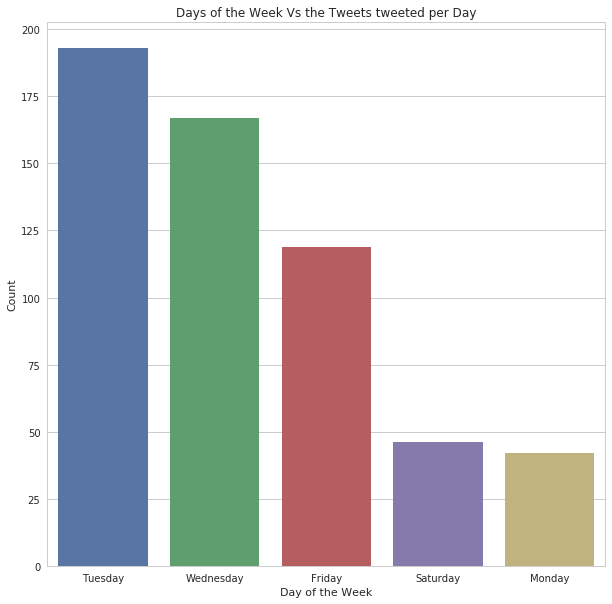

In [35]:
day_of_the_week=dataset.groupby(by=['Name of the Day'],as_index=False).count().sort_values(by='Tweet',ascending=False).head()

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=day_of_the_week['Name of the Day'],y=day_of_the_week['Tweet'], data=day_of_the_week)
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.title("Days of the Week Vs the Tweets tweeted per Day")

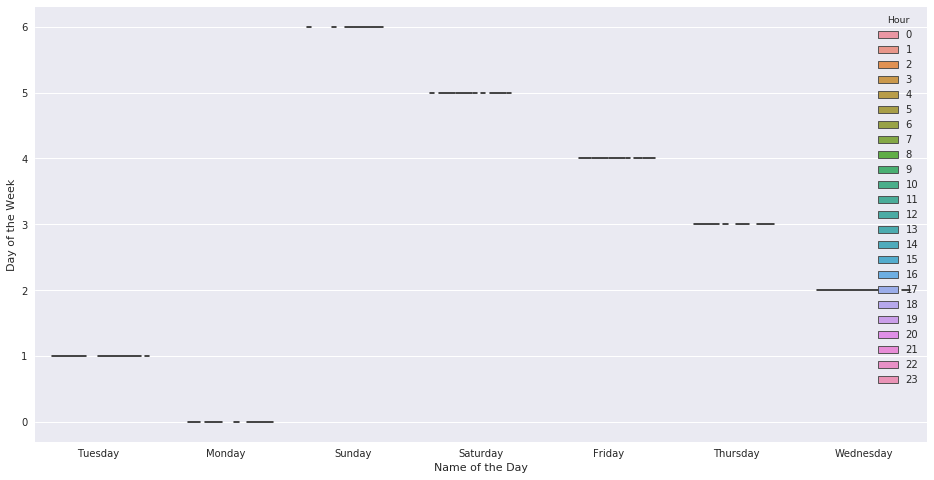

In [24]:
plt.figure(figsize=(16,8))
sns.boxplot(x='Name of the Day',y='Day of the Week', hue='Hour',data=dataset)

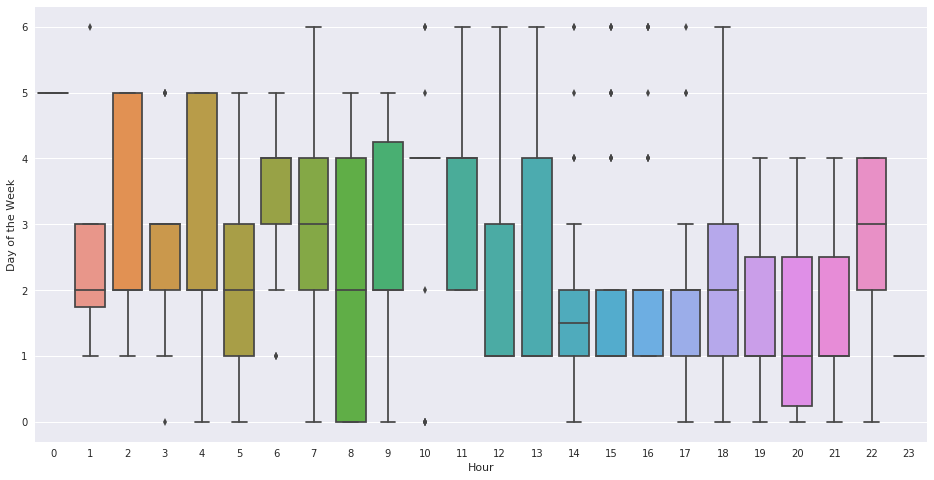

In [108]:
plt.figure(figsize=(16,8))
sns.boxplot(x='Hour',y='Day of the Week', data=dataset)

## Plotting of the Minutes of Tweeting Vs the Day of the Week

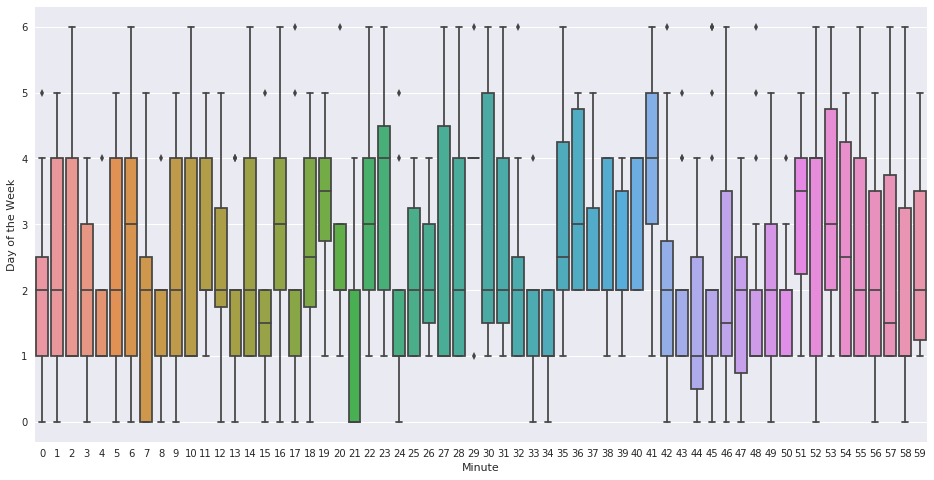

In [109]:
plt.figure(figsize=(16,8))
sns.boxplot(x='Minute',y='Day of the Week', data=dataset)

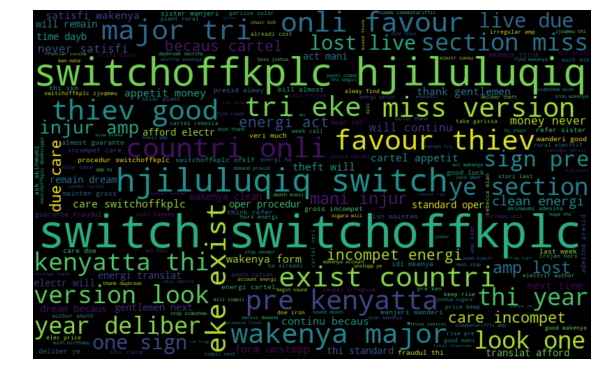

In [35]:
# Creating word Cloud for all Words in all tweets
allWords = ' '.join([text for text in dataset['Tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(allWords)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [40]:
from nltk.corpus import stopwords
from textblob import TextBlob


In [41]:
dataset['Sentiment'] = dataset['Tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

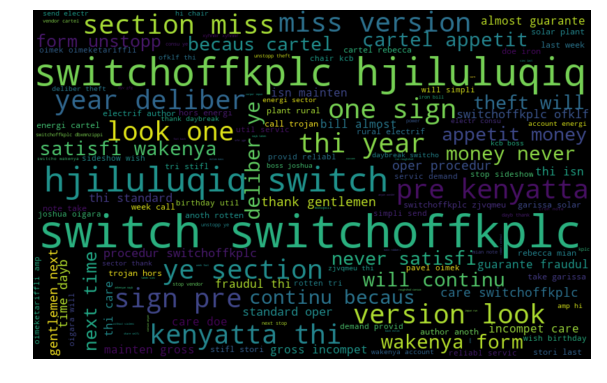

In [42]:
# Creating word Cloud for all Words in all positive tweets
positiveWords = ' '.join([text for text in dataset['Tweet'][dataset['Sentiment'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positiveWords)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

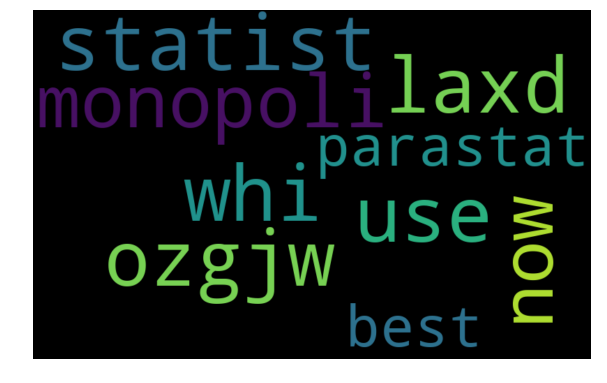

In [43]:
# Creating word Cloud for all Words in all negative tweets
positiveWords = ' '.join([text for text in dataset['Tweet'][dataset['Sentiment'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positiveWords)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

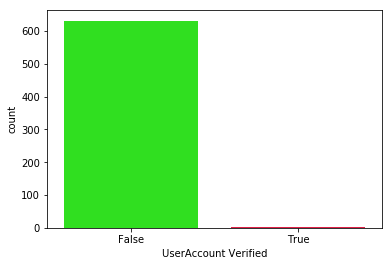

In [102]:
sns.countplot(x = 'UserAccount Verified', data = dataset)

In [44]:
#Function Collecting HashTag
def collectHashtag(x):
    hashtags = []    
    for i in x:        
        ht = re.findall(r"#(\w+)", i)        
        hashtags.append(ht)     
    return hashtags

In [45]:
#Collect all the hashtags in positive and negative tweets
HT_positive = collectHashtag(dataset['Tweet'][dataset['Sentiment'] == 0])
#Nested List to Un-nested List
HT_positive = sum(HT_positive,[])

HT_negative = collectHashtag(dataset['Tweet'][dataset['Sentiment'] == 1])
HT_negative = sum(HT_negative,[])

In [46]:
corpus_positive = nltk.FreqDist(HT_positive)
corpus_negative = nltk.FreqDist(HT_negative)

In [47]:
d = pd.DataFrame({'Hashtag':list(corpus_positive.keys()),'Count':list(corpus_positive.values())})
d = d.nlargest(columns='Count',n=20)

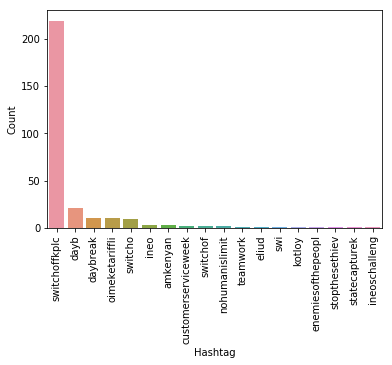

<Figure size 1152x360 with 0 Axes>

In [48]:
ax = sns.barplot(data = d,x = 'Hashtag',y = 'Count')
plt.figure(figsize=(16,5))
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

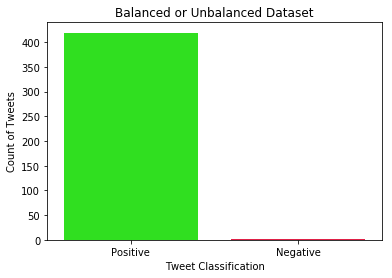

('No of Tweets labelled as Non-Sexist:', 419)
('No of Tweets labelled as Sexist:', 1)
('Data is highly unbalanced with only', 0.0, '% negative points and ', 0.0, '% positive points')


In [60]:
positive = dataset['Sentiment'].value_counts()[0]
negative = dataset['Sentiment'].value_counts()[1]

flatui = ["#15ff00", "#ff0033"]
sns.set_palette(flatui)
sns.barplot(['Positive','Negative'],[positive,negative])
plt.xlabel('Tweet Classification')
plt.ylabel('Count of Tweets')
plt.title('Balanced or Unbalanced Dataset')
plt.show()

print('No of Tweets labelled as Non-Sexist:',positive)
print('No of Tweets labelled as Sexist:',negative)

print('Data is highly unbalanced with only',round(((negative/(negative+positive))*100),2),'% negative points and ',
      round(((positive/(negative+positive))*100),2),'% positive points')

In [52]:
#Vectorization
#Importing Required Packages

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import gensim

In [53]:
#Applying Bag of Words Vectorization to the Tweets
bow_vectorizer = CountVectorizer(stop_words= 'english')
bow = bow_vectorizer.fit_transform(dataset['Tweet'])

In [54]:
#Applying TF-IDF Vectorization to the Tweets
tfidf_vectorizer = TfidfVectorizer(stop_words= 'english')
tfidf = tfidf_vectorizer.fit_transform(dataset['Tweet'])

In [61]:
dataset.head(3)

,Datetime Created,Tweet,Language,Location,UserAccount Verified,Tweet Source,Retweet_count,Favourite_count,Sentiment
0,2019-10-15 06:24:10,that you switch off #switchoffkplc http hjilul...,en,TinkerBellLand,False,Twitter Web App,119,0,0.000
1,2019-10-15 04:08:22,renew gener more electr than fossil fuel for t...,en,NaN,False,Twitter for Android,0,1,0.375
2,2019-10-14 18:00:17,jameni #switchoffkplc http sjivtbwd,in,Nairobi,False,Twitter for Android,0,0,0.000


#### Removing Twitter Handles (@user)

In [63]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

In [64]:
dataset['Tweet'] = np.vectorize(remove_pattern)(dataset['Tweet'], "@[\w]*")

In [101]:
dataset.head(3)

,Datetime Created,Tweet,Language,Location,UserAccount Verified,Tweet Source,Retweet_count,Favourite_count,Sentiment
0,2019-10-15 06:24:10,"[that, you, switch, off, switchoffkplc, http, ...",en,TinkerBellLand,False,Twitter Web App,119,0,0.000
1,2019-10-15 04:08:22,"[renew, gener, more, electr, than, fossil, fue...",en,NaN,False,Twitter for Android,0,1,0.375
2,2019-10-14 18:00:17,"[jameni, switchoffkplc, http, sjivtbwd]",in,Nairobi,False,Twitter for Android,0,0,0.000


## 4. Extracting Features from Cleaned Tweets

To analyze a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques – Bag-of-Words, TF-IDF, and Word Embeddings. In this article, we will be covering only Bag-of-Words and TF-IDF.

#### Bag-of-Words Features

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(dataset['Tweet'])

#### TF-IDF Features

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(dataset['Tweet'])

In [99]:
import os
import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics



In [100]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

dataset['Tweet'] = dataset['Tweet'].apply(lambda x: tokenization(x.lower()))
dataset.head()

,Datetime Created,Tweet,Language,Location,UserAccount Verified,Tweet Source,Retweet_count,Favourite_count,Sentiment
0,2019-10-15 06:24:10,"[that, you, switch, off, switchoffkplc, http, ...",en,TinkerBellLand,False,Twitter Web App,119,0,0.000
1,2019-10-15 04:08:22,"[renew, gener, more, electr, than, fossil, fue...",en,NaN,False,Twitter for Android,0,1,0.375
2,2019-10-14 18:00:17,"[jameni, switchoffkplc, http, sjivtbwd]",in,Nairobi,False,Twitter for Android,0,0,0.000
3,2019-10-13 16:29:21,"[thi, wa, not, attend, are, still, the, dark, ...",en,"Nairobi, Kenya",False,Twitter for Android,0,0,-0.150
4,2019-10-13 15:35:09,"[kplc, must, switch, off, switchoffkplc]",en,NaN,False,Twitter for Android,0,1,0.000
